In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [37]:
df=pd.read_csv("diabetes.csv")

In [38]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [40]:
# Outcome & pregnancies are categorical column(taking it categorical)
# BMI and DiabetesPedigreeFunction are float columns
# other columns are integer columns

In [41]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [42]:
# Pregnancies- the number of pregnancies done by each woman(range: 0-17)
# Glucose - glucose level of each woman(in the range of 0-199)
# Bloodpressure - Bp of woman(range:0-122)
# SkinThickness - skin thickness of woman(range:0-99)
# Insulin - insulin value of woman(range:0-846)
# BMI - Bmi of woma(range:0-67)
# DiabetesPedigreeFunction - Diabetes percentage(range:0.07-2.42)
# Age - age of woman(range:21-81)
# Outcome -diabetes present or not/it is target column


In [43]:
df.shape

(768, 9)

In [44]:
# the dataset has 768 rows and 9 columns

In [45]:
#checking for null values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [46]:
#checking for duplicates
df.duplicated().sum()

0

## Univariate Analysis

In [47]:
# pregnancies

In [48]:
#since it is a categorical column dividing it into 3 categories(taking it as category)

In [49]:
df["Pregnancies"].unique()

array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14],
      dtype=int64)

In [50]:
df["Pregnancies1"]=df["Pregnancies"].apply(lambda x: "low" if x<7 else "medium"if x<13 else "high")

In [51]:
df["Pregnancies1"].value_counts()

Pregnancies1
low       599
medium    155
high       14
Name: count, dtype: int64

<Axes: xlabel='Pregnancies1', ylabel='count'>

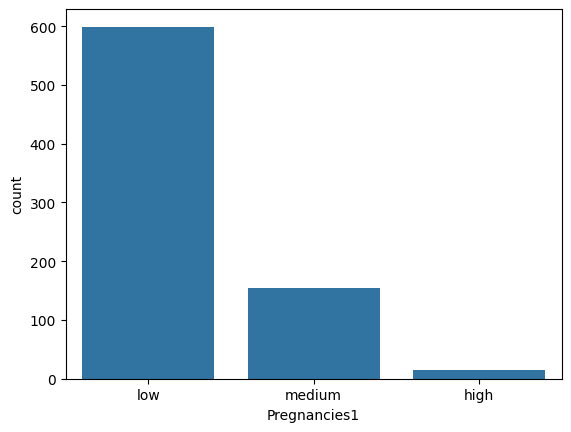

In [52]:
sns.barplot(df["Pregnancies1"].value_counts())

In [53]:
#77.9 percent have low diabetes,20.18 percentage are medium and 1.82 percentage have high diabetes

In [54]:
# glucose
df["Glucose"].unique()

array([148,  85, 183,  89, 137, 116,  78, 115, 197, 125, 110, 168, 139,
       189, 166, 100, 118, 107, 103, 126,  99, 196, 119, 143, 147,  97,
       145, 117, 109, 158,  88,  92, 122, 138, 102,  90, 111, 180, 133,
       106, 171, 159, 146,  71, 105, 101, 176, 150,  73, 187,  84,  44,
       141, 114,  95, 129,  79,   0,  62, 131, 112, 113,  74,  83, 136,
        80, 123,  81, 134, 142, 144,  93, 163, 151,  96, 155,  76, 160,
       124, 162, 132, 120, 173, 170, 128, 108, 154,  57, 156, 153, 188,
       152, 104,  87,  75, 179, 130, 194, 181, 135, 184, 140, 177, 164,
        91, 165,  86, 193, 191, 161, 167,  77, 182, 157, 178,  61,  98,
       127,  82,  72, 172,  94, 175, 195,  68, 186, 198, 121,  67, 174,
       199,  56, 169, 149,  65, 190], dtype=int64)

In [55]:
#since it is a numerical column we check for gaussian
from scipy.stats import anderson
def gaussian_check(n):
    sns.distplot(n,kde=True)
    plt.title("dist plot")
    plt.show()
    stats.probplot(n,dist="norm",plot=plt)
    plt.title("qq plot")
    plt.show()
    x=anderson(n)
    print(x.statistic)
    print(x.critical_values)
    if x.statistic<x.critical_values[2]:
        print("Gaussian")
    else:
        print("Non Gaussian")    

C:\Users\pc\AppData\Local\Temp\ipykernel_2264\174508571.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(n,kde=True)


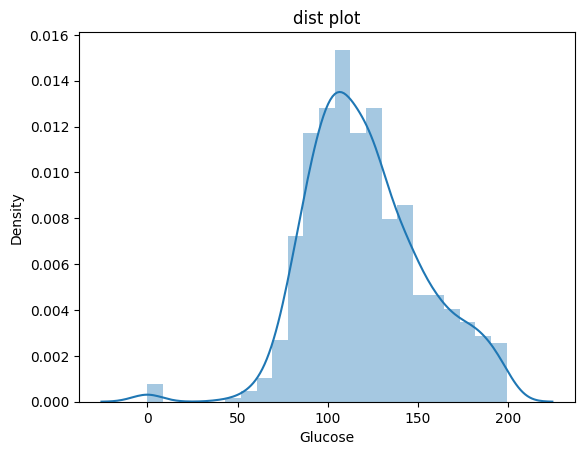

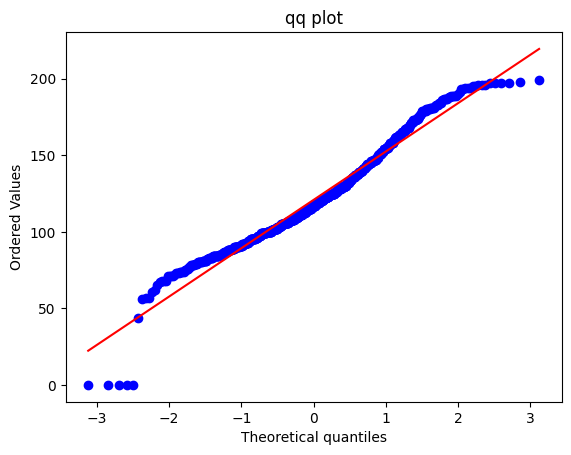

5.965074622477118
[0.573 0.653 0.783 0.913 1.086]
Non Gaussian


In [56]:
gaussian_check(df["Glucose"])

<Axes: ylabel='Glucose'>

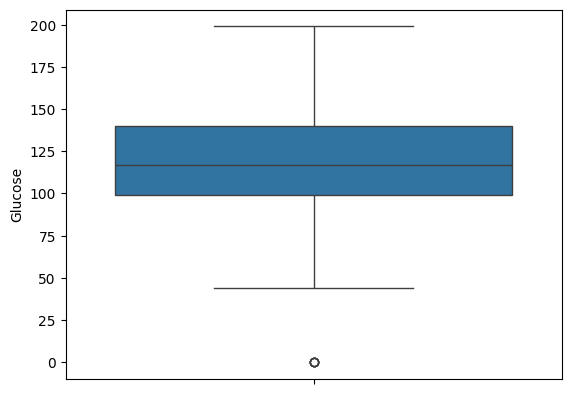

In [57]:
# Checking for outliers
sns.boxplot(df["Glucose"])


In [58]:
# since it is non gaussian filling outliers with iqr
def outliers_handle(n):
    q1=np.percentile(n,25)
    q3=np.percentile(n,75)
    iqr=q3-q1
    lb=q1-1.5*iqr
    ub=q3+1.5*iqr
    n[n<lb]=lb
    n[n>ub]=ub
    print("outliers handled")

In [59]:
outliers_handle(df["Glucose"])

outliers handled


C:\Users\pc\AppData\Local\Temp\ipykernel_2264\1773351612.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n[n<lb]=lb
C:\Users\pc\AppData\Local\Temp\ipykernel_2264\1773351612.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '37.125' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  n[n<lb]=lb


In [60]:
#checking for skewness
stats.skew(df["Glucose"])

0.41712947618943413

In [61]:
# the distribution is somewhat symmetric 

In [62]:
stats.kurtosis(df["Glucose"])

-0.1391038776048763

In [63]:
# light tail fewer outliers

In [246]:
#Blood pressure,since it is a numerical column checking for gaussian
df["BloodPressure"].unique()

array([ 72,  66,  64,  40,  74,  50,   0,  70,  96,  92,  80,  60,  84,
        30,  88,  90,  94,  76,  82,  75,  58,  78,  68, 110,  56,  62,
        85,  86,  48,  44,  65, 108,  55, 122,  54,  52,  98, 104,  95,
        46, 102, 100,  61,  24,  38, 106, 114], dtype=int64)

C:\Users\pc\AppData\Local\Temp\ipykernel_3000\174508571.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(n,kde=True)


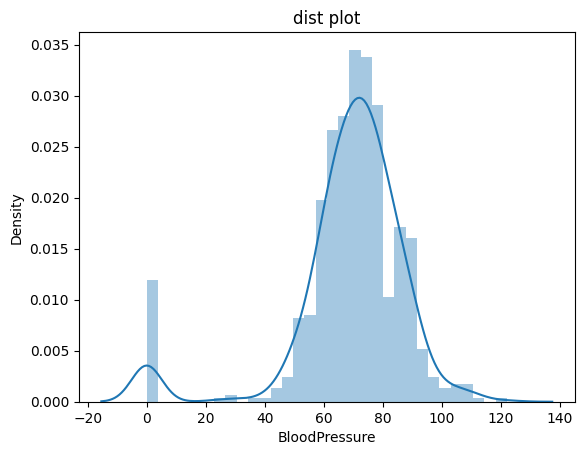

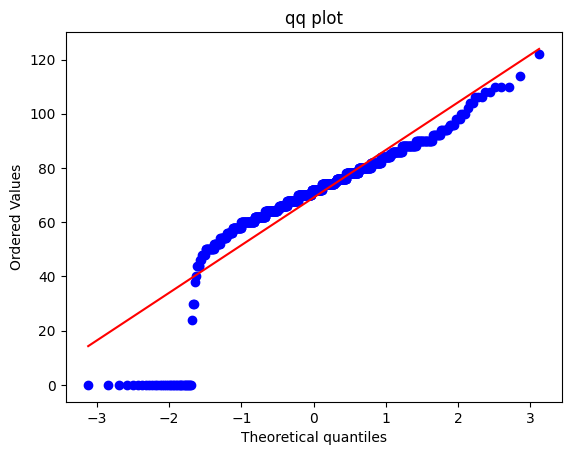

33.90093524860686
[0.573 0.653 0.783 0.913 1.086]
Non Gaussian


In [247]:
# checking for gaussian
gaussian_check(df["BloodPressure"])

<Axes: ylabel='BloodPressure'>

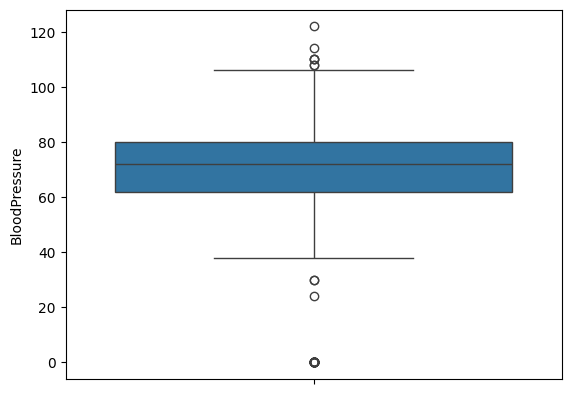

In [248]:
#checking for outliers
sns.boxplot(df["BloodPressure"])

In [249]:
#since it has outliers and non gaussian so filling with iqr
outliers_handle(df["BloodPressure"])

outliers handled


C:\Users\pc\AppData\Local\Temp\ipykernel_3000\1773351612.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n[n<lb]=lb
C:\Users\pc\AppData\Local\Temp\ipykernel_3000\1773351612.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n[n>ub]=ub


In [250]:
#no outliers

In [64]:
#cheking for skewness
stats.skew(df["BloodPressure"])

-1.8400052311728738

In [65]:
#highly left skewed

In [66]:
#checking for kurtosis
stats.kurtosis(df["BloodPressure"])

5.138690662525438

In [67]:
#the peakness is high

C:\Users\pc\AppData\Local\Temp\ipykernel_3000\174508571.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(n,kde=True)


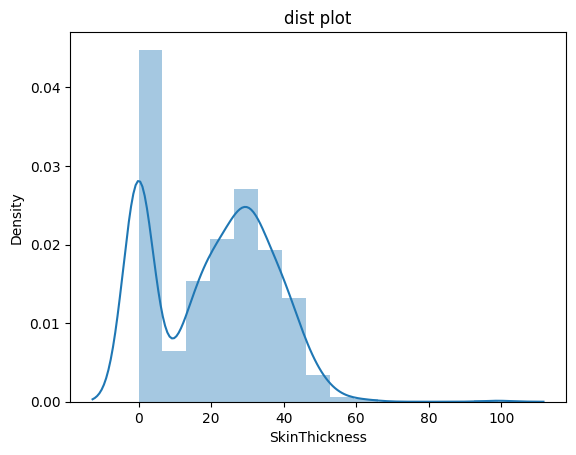

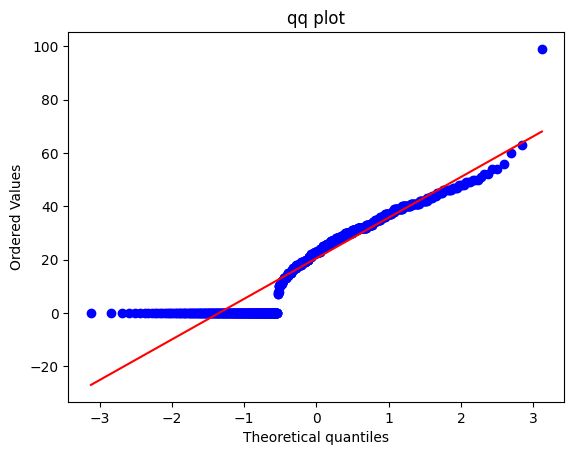

24.618666927987874
[0.573 0.653 0.783 0.913 1.086]
Non Gaussian


In [251]:
# skinthickness /numerical column checking for gaussian
gaussian_check(df["SkinThickness"])

<Axes: ylabel='SkinThickness'>

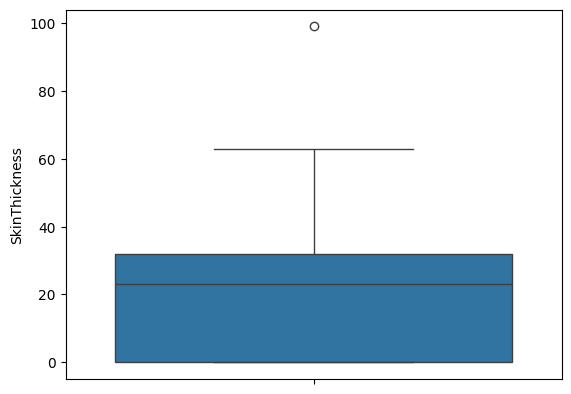

In [252]:
#checking for outliers 
sns.boxplot(df["SkinThickness"])


In [253]:
# since it is non gaussian so filling outliers with iqr
outliers_handle(df["SkinThickness"])

outliers handled


C:\Users\pc\AppData\Local\Temp\ipykernel_3000\1773351612.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n[n<lb]=lb
C:\Users\pc\AppData\Local\Temp\ipykernel_3000\1773351612.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n[n>ub]=ub


In [68]:
#checking for skewness 
stats.skew(df["SkinThickness"])

0.109158762323673

In [69]:
# slightly right skewed

In [70]:
# cheking for kurtosis
stats.kurtosis(df["SkinThickness"])

-0.5244944887652805

In [71]:
# low peakness that is the data is spreded and there are less outliers

C:\Users\pc\AppData\Local\Temp\ipykernel_3000\174508571.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(n,kde=True)


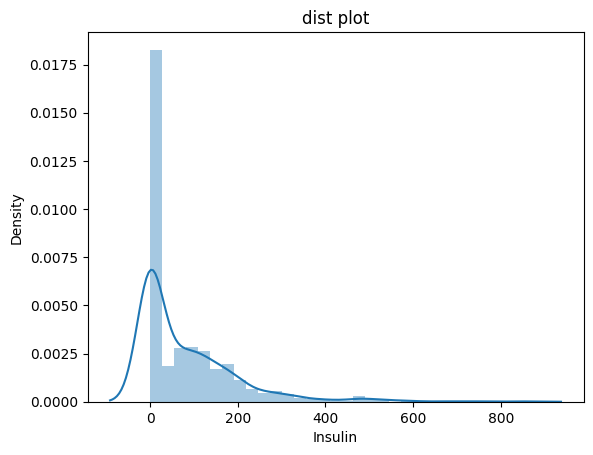

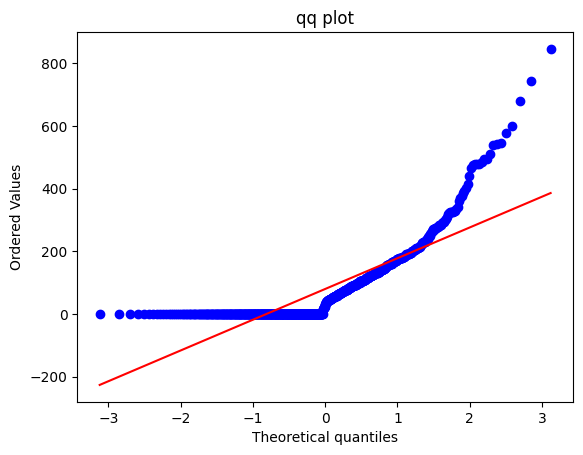

63.33202212543665
[0.573 0.653 0.783 0.913 1.086]
Non Gaussian


In [254]:
#insulin/numerical column so checking for gaussian
gaussian_check(df["Insulin"])

In [1]:
#most 0f the patients have 0 insulin level

<Axes: ylabel='Insulin'>

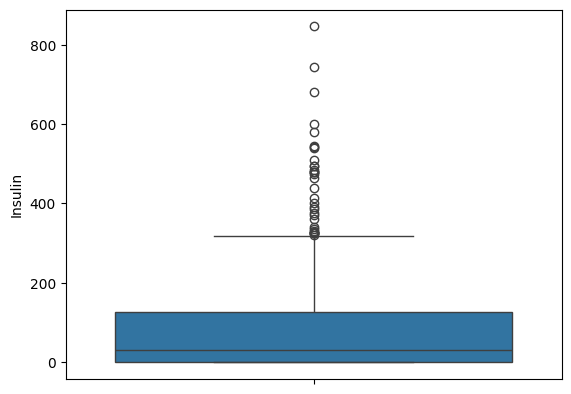

In [255]:
#checking for ouliers
sns.boxplot(df["Insulin"])

In [256]:
#since it is non gaussian,so filling outliers with iqr
outliers_handle(df["Insulin"])

outliers handled


C:\Users\pc\AppData\Local\Temp\ipykernel_3000\1773351612.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n[n<lb]=lb
C:\Users\pc\AppData\Local\Temp\ipykernel_3000\1773351612.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n[n>ub]=ub
C:\Users\pc\AppData\Local\Temp\ipykernel_3000\1773351612.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '318.125' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  n[n>ub]=ub


In [72]:
# checking for skewness
stats.skew(df["Insulin"])

2.2678104585131753

In [ ]:
#hihgly right skewed

In [74]:
# checking for kurtosis
stats.kurtosis(df["Insulin"])

7.159574916971424

In [75]:
# high peakness ,thera are more outliers

C:\Users\pc\AppData\Local\Temp\ipykernel_3000\174508571.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(n,kde=True)


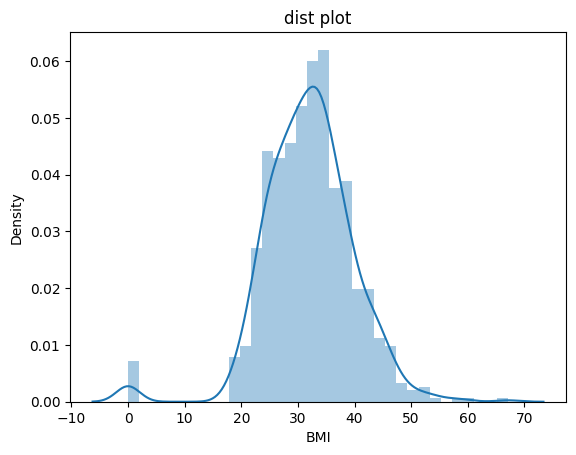

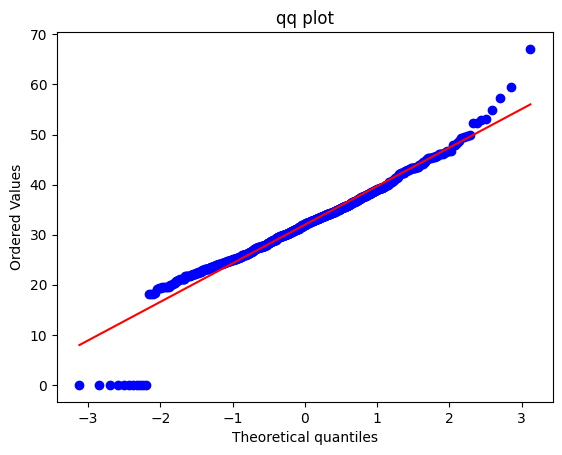

4.189156224459907
[0.573 0.653 0.783 0.913 1.086]
Non Gaussian


In [257]:
#BMI/numerical column
# checking for gaussian
gaussian_check(df["BMI"])

<Axes: ylabel='BMI'>

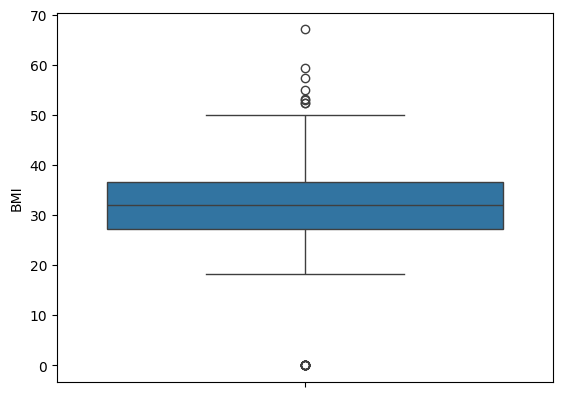

In [258]:
#cheking for outliers
sns.boxplot(df["BMI"])

In [259]:
# since it is non gaussian filling outliers with iqr
outliers_handle(df["BMI"])

outliers handled


C:\Users\pc\AppData\Local\Temp\ipykernel_3000\1773351612.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n[n<lb]=lb
C:\Users\pc\AppData\Local\Temp\ipykernel_3000\1773351612.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n[n>ub]=ub


In [76]:
stats.skew(df["BMI"])

-0.42814327880861786

In [77]:
# left skewed,most of the data lies in the left region

In [78]:
#checking for kurtosis
stats.kurtosis(df["BMI"])

3.2612574203612645

In [79]:
#high peakness more outliers

C:\Users\pc\AppData\Local\Temp\ipykernel_3000\174508571.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(n,kde=True)


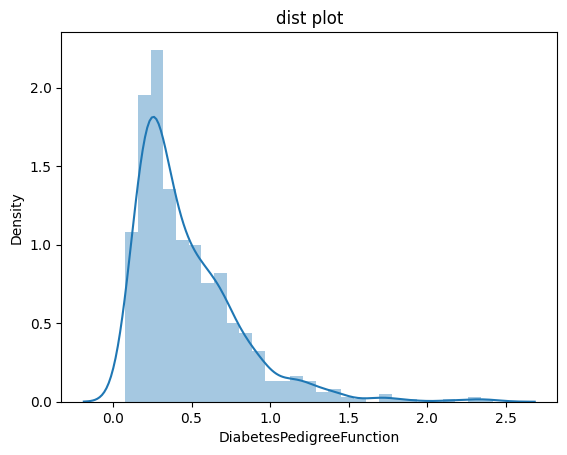

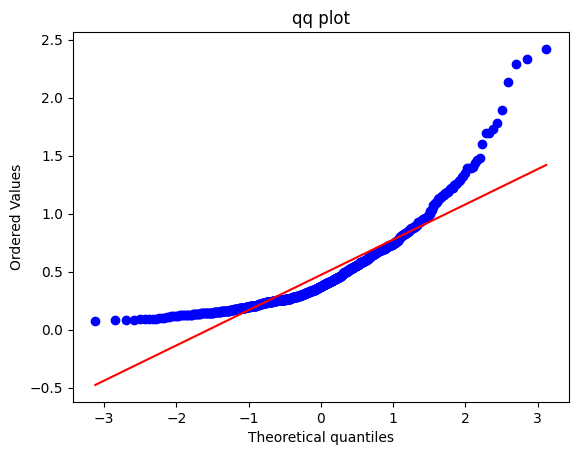

29.13404800507169
[0.573 0.653 0.783 0.913 1.086]
Non Gaussian


In [260]:
# DiabetesPedigreeFunction /numerical column
#cheking for gaussian
gaussian_check(df["DiabetesPedigreeFunction"])


<Axes: ylabel='DiabetesPedigreeFunction'>

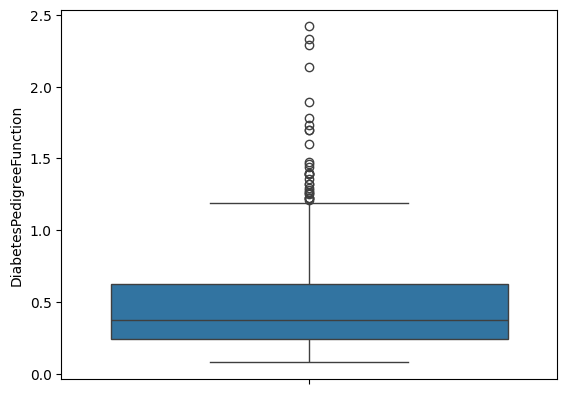

In [261]:
#checking for outliers
sns.boxplot(df["DiabetesPedigreeFunction"])

In [262]:
#since non gaussin,filling with iqr
outliers_handle(df["DiabetesPedigreeFunction"])

outliers handled


C:\Users\pc\AppData\Local\Temp\ipykernel_3000\1773351612.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n[n<lb]=lb
C:\Users\pc\AppData\Local\Temp\ipykernel_3000\1773351612.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n[n>ub]=ub


In [80]:
#checking for skewness
stats.skew(df["DiabetesPedigreeFunction"])

1.9161592037386292

In [81]:
# highly right skewed,most of the data lies in the right region

In [82]:
#checking for kurtosis
stats.kurtosis(df["DiabetesPedigreeFunction"])

5.550792047551203

In [83]:
# high peakness, more outliers

C:\Users\pc\AppData\Local\Temp\ipykernel_3000\174508571.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(n,kde=True)


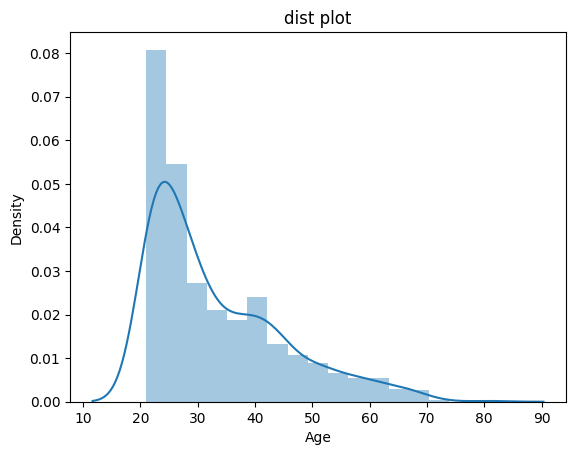

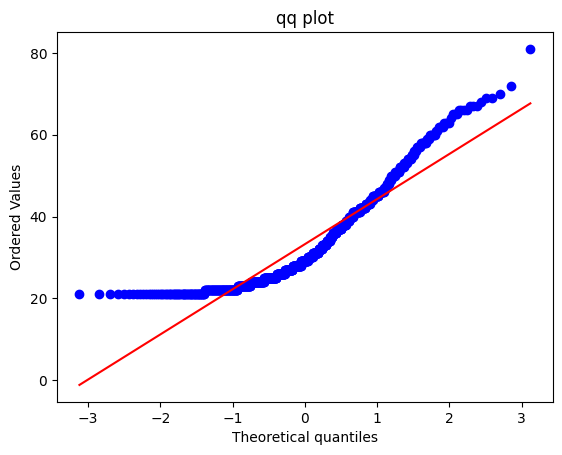

30.02789814127209
[0.573 0.653 0.783 0.913 1.086]
Non Gaussian


In [263]:
# age /numercial column checking for gaussian
gaussian_check(df["Age"])

<Axes: ylabel='Age'>

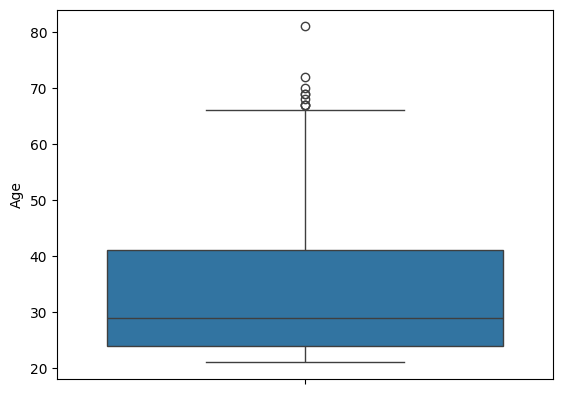

In [264]:
#checking for outliers
sns.boxplot(df["Age"])

In [265]:
# filling outliers with iqr
outliers_handle(df["Age"])

outliers handled


C:\Users\pc\AppData\Local\Temp\ipykernel_3000\1773351612.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n[n<lb]=lb
C:\Users\pc\AppData\Local\Temp\ipykernel_3000\1773351612.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n[n>ub]=ub
C:\Users\pc\AppData\Local\Temp\ipykernel_3000\1773351612.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '66.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  n[n>ub]=ub


In [84]:
# checking for skewness
stats.skew(df["Age"])

1.127389259531697

In [85]:
# highly right skewed,most of the data lies in the right region

In [86]:
#checking for kurtosis
stats.kurtosis(df["Age"])

0.6311769413798585

In [88]:
# peaked ,some outliers

In [266]:
# outcome/ categorical column
df["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

<Axes: xlabel='Outcome', ylabel='count'>

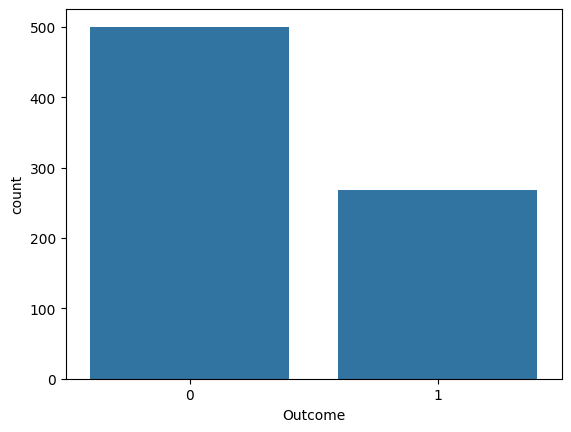

In [267]:
sns.barplot(df["Outcome"].value_counts())

In [269]:
# 65 percent woman dont have outliers while 35 percent have diabetes

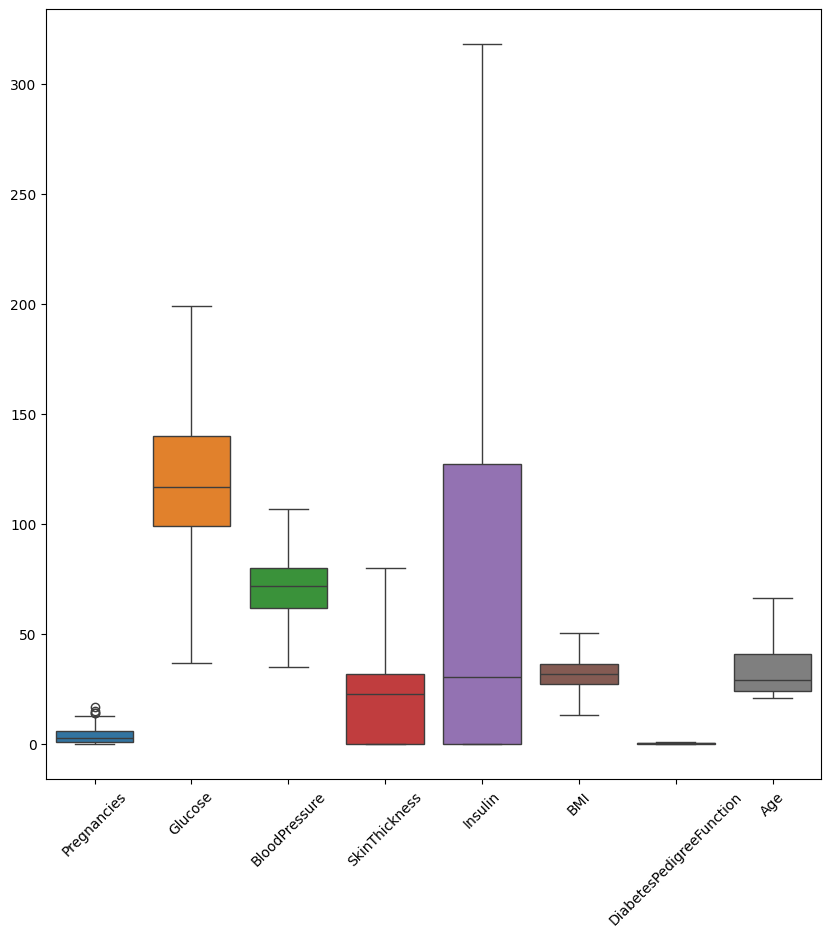

In [270]:
# there are no outliers in columns
r=df.drop(columns=["Outcome"])
plt.figure(figsize=(10,10))
sns.boxplot(r)
plt.xticks(rotation=45)
plt.show()

In [ ]:
#no outliers in columns

## Bivariate analysis

In [271]:
#checking if there is any relationship between pregnancies and outcome
v=pd.crosstab(df["Pregnancies1"],df["Outcome"])

In [272]:
v

Outcome,0,1
Pregnancies1,,
high,5,9
low,426,173
medium,69,86


In [273]:
chi,p,dof,expected=stats.chi2_contingency(v)

In [274]:
p

3.115670809406128e-10

In [275]:
# the p value is less than 5 percent so null hypothesis accepted that is Pregnancies is dependent on outcome

<Axes: xlabel='Pregnancies1'>

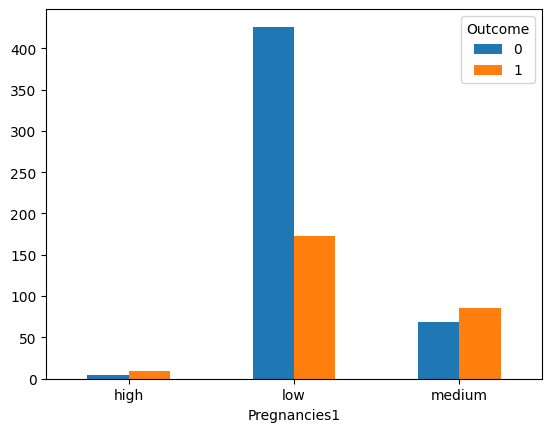

In [276]:
#plotting crosstab graph
v.plot.bar(rot=0)

In [277]:
# checking if there is any relationship between glucose and outcome

In [278]:
diabetic=df[df["Outcome"]==1]["Glucose"]
non_diabetic=df[df["Outcome"]==0]["Glucose"]

In [279]:
t_stats,P=stats.ttest_ind(diabetic,non_diabetic,alternative="two-sided")

In [280]:
P

2.4619599112825017e-45

In [281]:
# less than 5 percent so there is significant difference between this two columns h1 accepted

In [282]:
t_stats,P=stats.ttest_ind(diabetic,non_diabetic,alternative="less")

In [283]:
P

1.0

In [125]:
# mean of diabetic is greater than mean of non diabetic | h0 accepted

In [126]:
t_stats,P=stats.ttest_ind(diabetic,non_diabetic,alternative="greater")

In [127]:
P

1.2309799556412509e-45

In [2]:
# mean of diabetic greater than mean of non diabetic //they are not equal

<Axes: xlabel='Outcome', ylabel='Glucose'>

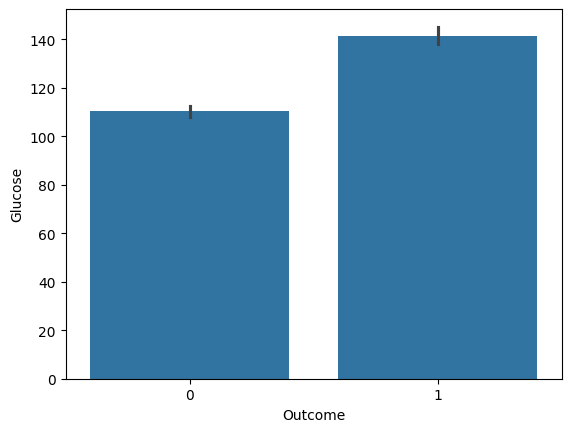

In [131]:
sns.barplot(x=df["Outcome"],y=df["Glucose"])

In [132]:
#checking if there is any relationship between bloodpressure and outcome

In [133]:
#since bp is numerical and outcome is categorical we perform ttest 

In [136]:
diabetic1=df[df["Outcome"]==1]["BloodPressure"]
non_diabetic1=df[df["Outcome"]==0]["BloodPressure"]

In [138]:
t_stats,P=stats.ttest_ind(diabetic1,non_diabetic1,alternative="two-sided")

In [139]:
P

0.0016613575415501624

In [3]:
# less than 5 percent so null hypothesis rejected ,they have significant difference in their means

In [141]:
t_stats,P=stats.ttest_ind(diabetic1,non_diabetic1,alternative="less")

In [142]:
P

0.9991693212292249

In [143]:
# greater than 5 percent null hypothesis ,so mean of diabetic >= mean of non diabetic based on blood pressure

In [144]:
t_stats,P=stats.ttest_ind(diabetic1,non_diabetic1,alternative="greater")

In [145]:
P

0.0008306787707750812

In [4]:
# mean of diabetic is greater than mean of non_diabetic //they are not equal 

<Axes: xlabel='Outcome', ylabel='BloodPressure'>

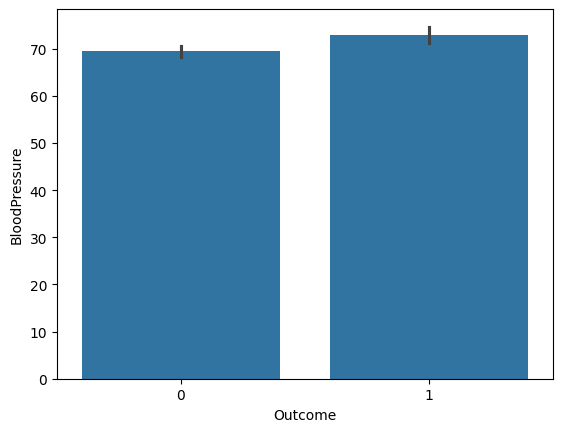

In [147]:
sns.barplot(x=df["Outcome"],y=df["BloodPressure"])

In [148]:
#cheking if there is any relationship between skinthickness and outcome 

In [149]:
diabetic2=df[df["Outcome"]==1]["SkinThickness"]
non_diabetic2=df[df["Outcome"]==0]["SkinThickness"]

In [169]:
t_stats,P=stats.ttest_ind(diabetic2,non_diabetic2,alternative="two-sided")

In [170]:
P

0.04277328322390769

In [152]:
#less than 5 percent ,so there is significant differnce between diabetic and non diabetic based on skinthickness

In [171]:
t_stats,P=stats.ttest_ind(diabetic2,non_diabetic2,alternative="less")

In [172]:
P

0.9786133583880461

In [155]:
#h0 accepted the mean of diabetic >= mean of non diabetic

In [173]:
t_stats,P=stats.ttest_ind(diabetic2,non_diabetic2,alternative="greater")

In [174]:
P

0.021386641611953847

In [5]:
# mean of diabetic is greater than the mean of non diabetic but they are not equal

<Axes: xlabel='Outcome', ylabel='SkinThickness'>

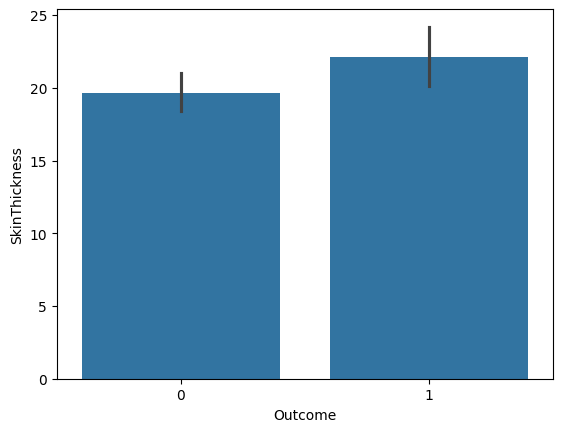

In [159]:
sns.barplot(x=df["Outcome"],y=df["SkinThickness"])

In [160]:
# checking if there is any relationship between insulin and outcome

In [162]:
diabetic3=df[df["Outcome"]==1]["Insulin"]
non_diabetic3=df[df["Outcome"]==0]["Insulin"]

In [175]:
t_stats,P=stats.ttest_ind(diabetic3,non_diabetic3,alternative="two-sided")

In [176]:
P

0.0005316746318630743

In [165]:
# there is significant differnce

In [177]:
t_stats,P=stats.ttest_ind(diabetic3,non_diabetic3,alternative="less")

In [178]:
P

0.9997341626840685

In [168]:
#diabetic>=non_diabetic 

In [179]:
t_stats,P=stats.ttest_ind(diabetic1,non_diabetic1,alternative="greater")

In [180]:
P

0.0008306787707750812

In [6]:
# the mean of diabetic is greater than the mean of non diabetic //they are not equal

<Axes: xlabel='Outcome', ylabel='Insulin'>

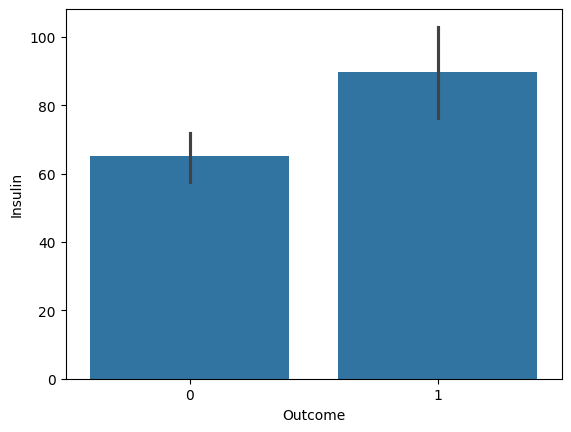

In [181]:
sns.barplot(x=df["Outcome"],y=df["Insulin"])

In [ ]:
#checking if there is any relationship between 

In [182]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [183]:
diabetic4=df[df["Outcome"]==1]["BMI"]
non_diabetic4=df[df["Outcome"]==0]["BMI"]

In [187]:
t_stats,P=stats.ttest_ind(diabetic4,non_diabetic4,alternative="two-sided")

In [188]:
P

1.5395912330609838e-18

In [186]:
# there is significant differnce 

In [189]:
t_stats,P=stats.ttest_ind(diabetic4,non_diabetic4,alternative="less")

In [190]:
P

1.0

In [191]:
#diabetic>=non_diabetic

In [192]:
t_stats,P=stats.ttest_ind(diabetic4,non_diabetic4,alternative="greater")

In [193]:
P

7.697956165304919e-19

In [7]:
# the mean of the diabetic greater than the non diabetic //but they are not equal

In [194]:
#checking if there is any relationship between DiabetesPedigreeFunction and outcome
diabetic5=df[df["Outcome"]==1]["DiabetesPedigreeFunction"]
non_diabetic5=df[df["Outcome"]==0]["DiabetesPedigreeFunction"]

In [198]:
t_stats,P=stats.ttest_ind(diabetic5,non_diabetic5,alternative="two-sided")

In [199]:
P

2.439852938745004e-07

In [197]:
# there is significant differnece

In [200]:
t_stats,P=stats.ttest_ind(diabetic5,non_diabetic5,alternative="less")

In [201]:
P

0.9999998780073531

In [8]:
# mean of the diabetic >=mean of non diabetic 

In [202]:
t_stats,P=stats.ttest_ind(diabetic5,non_diabetic5,alternative="greater")

In [203]:
P

1.219926469372502e-07

In [9]:
# the mean of the diabetic is greater than the non diabetic //but they are not equal

<Axes: xlabel='Outcome', ylabel='DiabetesPedigreeFunction'>

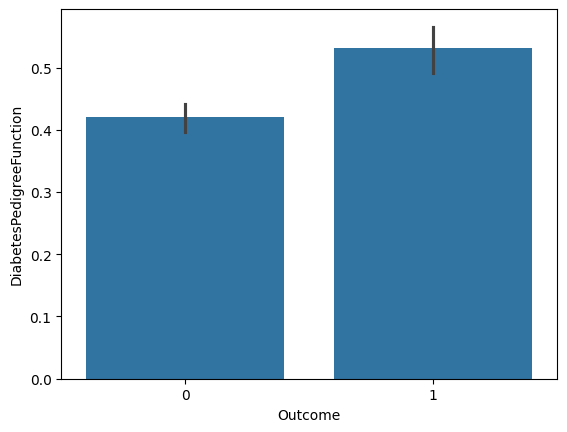

In [204]:
sns.barplot(x=df['Outcome'],y=df["DiabetesPedigreeFunction"])

In [205]:
# checking if there is any relationship between age and outcome
diabetic6=df[df["Outcome"]==1]["Age"]
non_diabetic6=df[df["Outcome"]==0]["Age"]

In [206]:
t_stats,P=stats.ttest_ind(diabetic6,non_diabetic6,alternative="two-sided")

In [207]:
P

9.284604951584015e-12

In [208]:
# no significant differnce

In [209]:
t_stats,P=stats.ttest_ind(diabetic6,non_diabetic6,alternative="less")

In [210]:
P

0.9999999999953577

In [ ]:
#diabetic>=non_diabetic

In [212]:
t_stats,P=stats.ttest_ind(diabetic6,non_diabetic6,alternative="greater")

In [213]:
P

4.642302475792008e-12

In [10]:
# the mean of diabetic is greater than mean of non diabetic// but they are not equal

<Axes: xlabel='Outcome', ylabel='Age'>

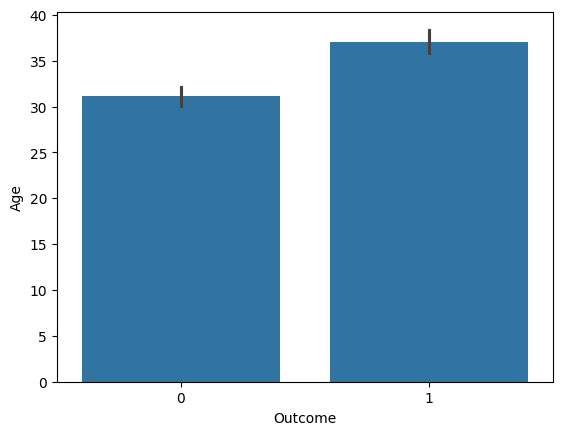

In [214]:
sns.barplot(x=df["Outcome"],y=df["Age"])

## Multivariate analysis

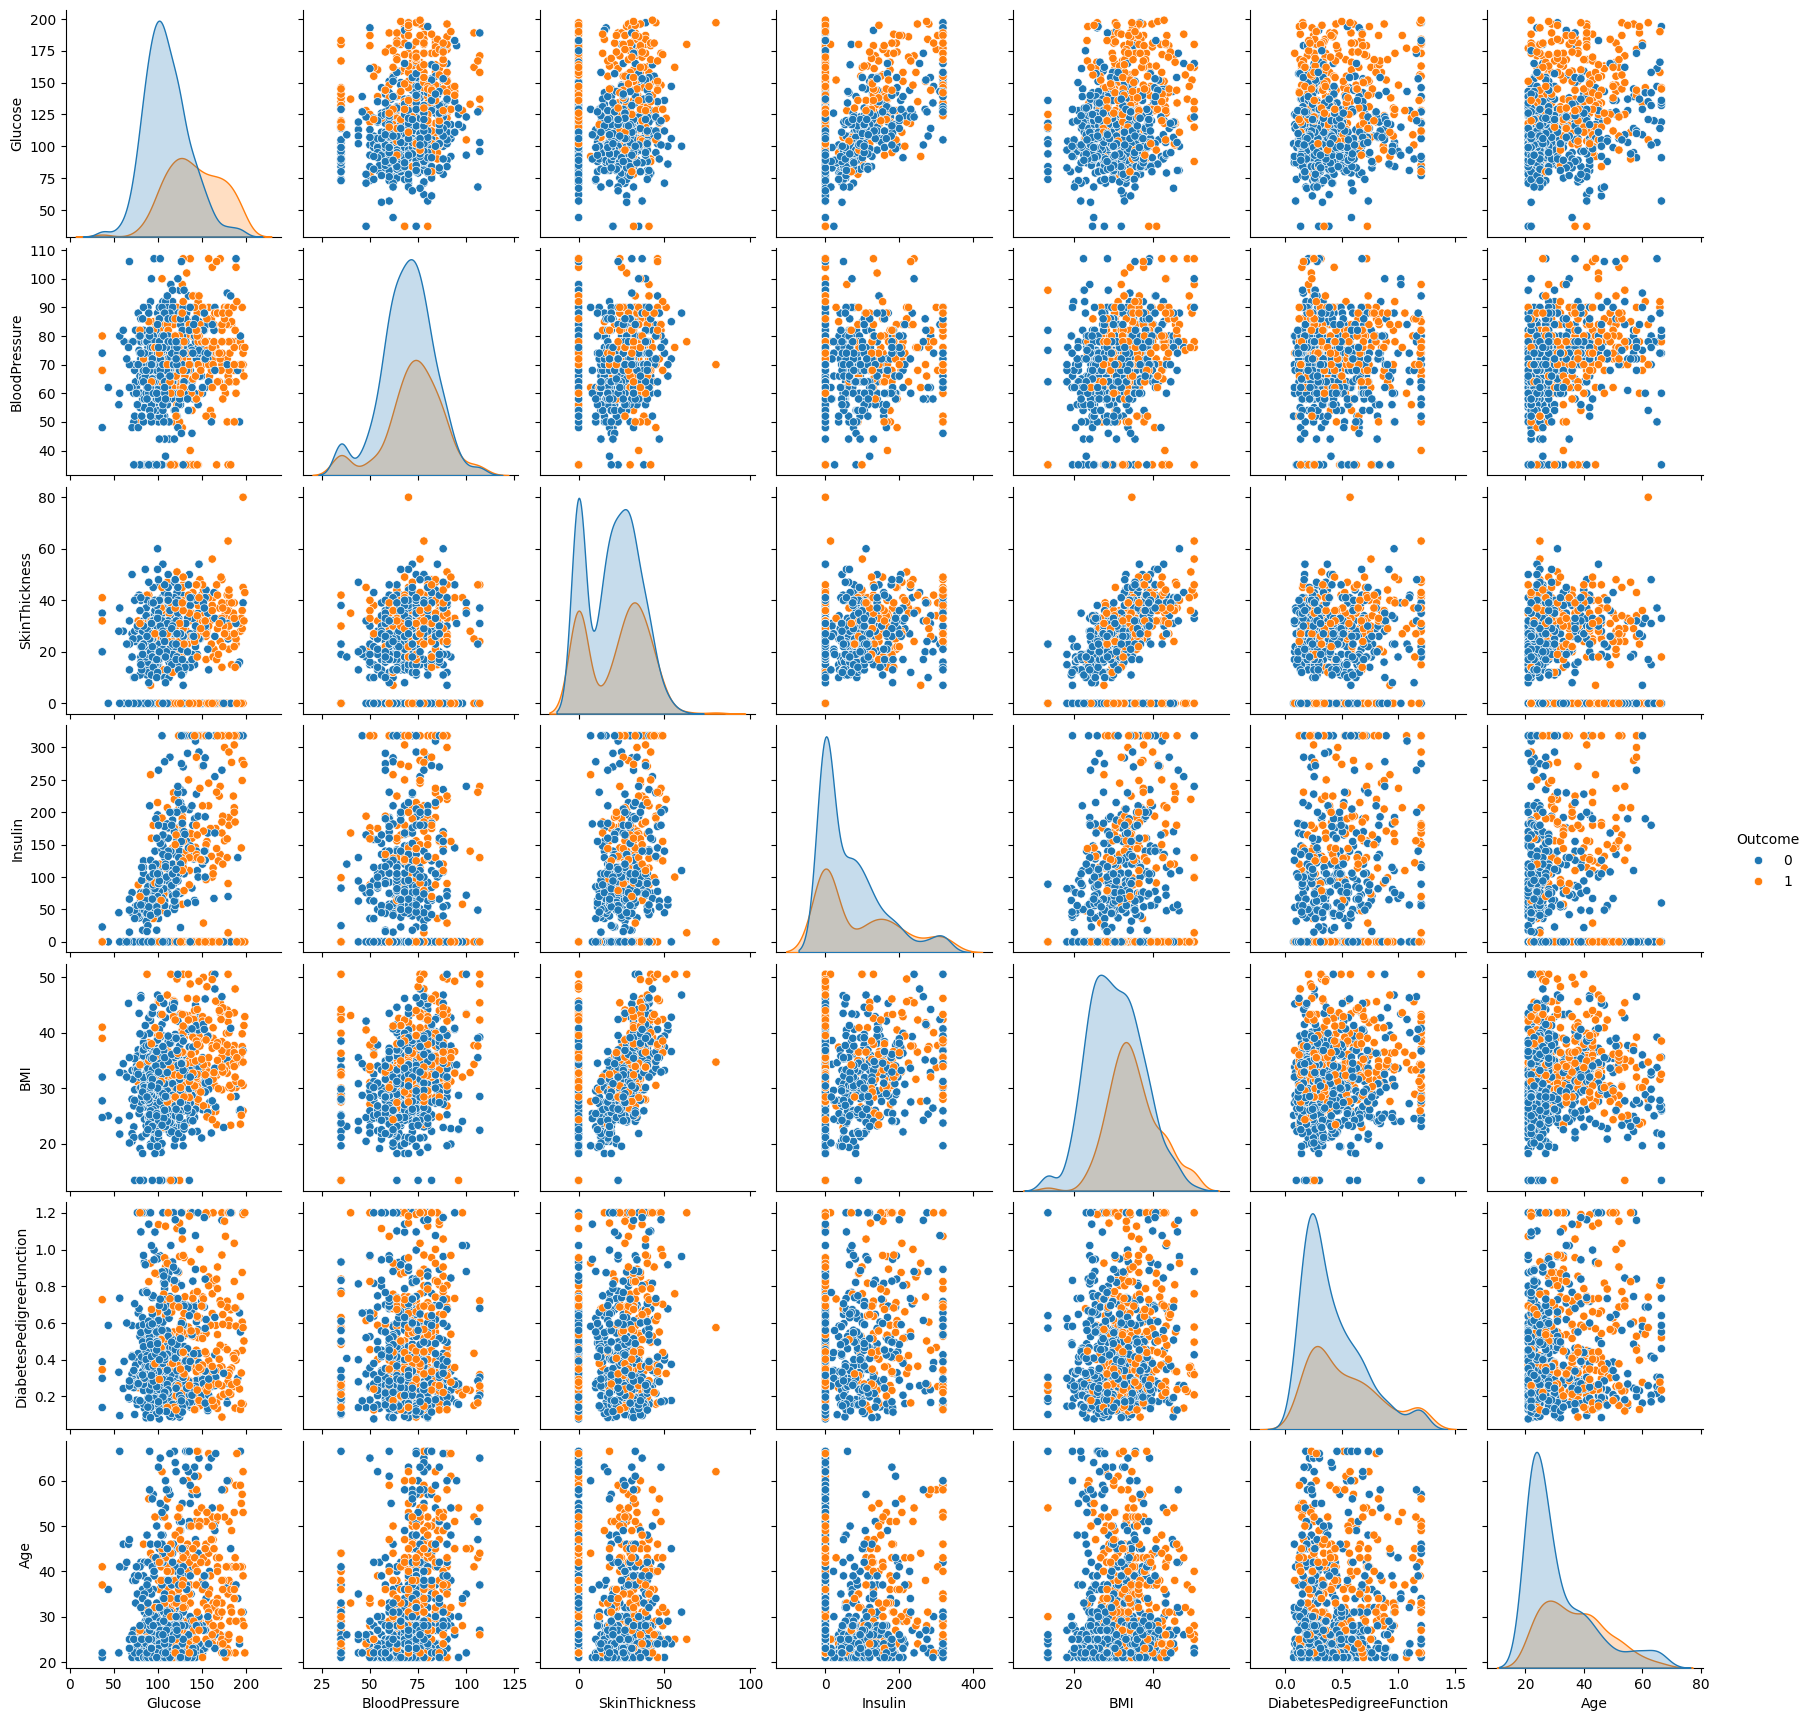

In [215]:
sns.pairplot(data=df,hue="Outcome")

In [11]:
# all the columns are correlated with the target column

In [285]:
#removing unnecessary columns
df.drop(columns=["Pregnancies1"],inplace=True)

<Axes: >

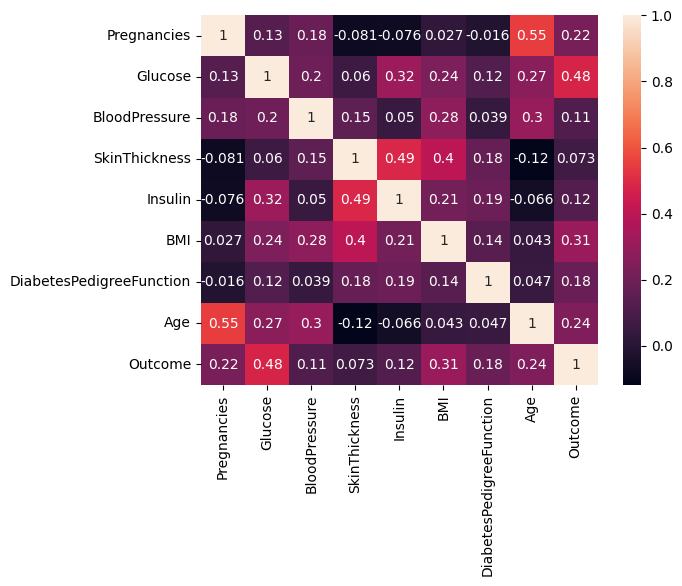

In [286]:
sns.heatmap(df.corr(),annot=True)

## Conclusion

In [13]:
# all the values have high correlation with the target column ,glucose have the maximum correlation with the target column
# i.e glucose level is the key factor of diabetic in woman